In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

In [3]:
df0 = pd.read_csv('HR_comma_sep.csv')
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df0.shape

(14999, 10)

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* There are 14999 rows and 10 columns in the dataset. 
- There are two float variables, `satisfaction_level` and `last_evaluation`, and two categorical variables, `department` and `salary`. Other variables have integer data type.

In [6]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

- There are no missing values in the dataset.

In [7]:
df0 = df0.rename(columns={'Work_accident': 'work_accident', 'Department':'department', 'average_montly_hours': 'average_monthly_hours'})
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
df0.duplicated().sum()

3008

- There is 3008 duplicated values which is 20% of the entire dataset. It is not likely that two employes give the same answers for every question. These duplicates are most likely not meaningful, therefore it will be removed from the dataset.

In [9]:
df = df0.drop_duplicates(keep='first')

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


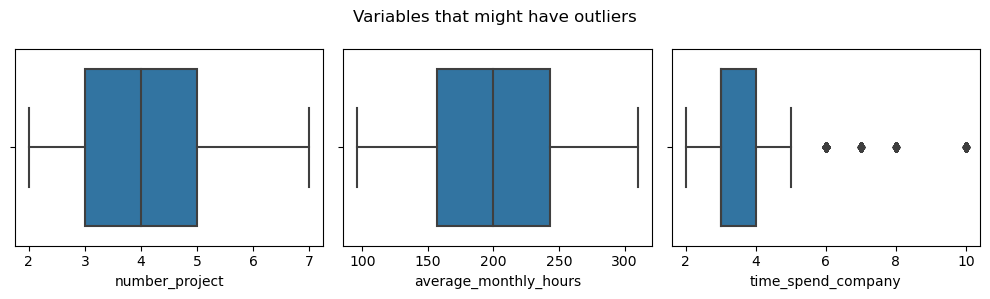

In [11]:
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,3)
fig.suptitle('Variables that might have outliers')
sns.boxplot(x=df['number_project'], ax=axes[0])
sns.boxplot(x=df['average_monthly_hours'], ax=axes[1])
sns.boxplot(x=df['time_spend_company'], ax=axes[2])
plt.tight_layout()

- `time_spend_company` seems to have some outliers.

In [12]:
q1 = np.percentile(df['time_spend_company'], 25)
q2 = np.percentile(df['time_spend_company'], 50)
q3 = np.percentile(df['time_spend_company'], 75)
IQR = q3 - q1

upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

print('upper limit:', upper_limit)
print('lower limit:', lower_limit)
outliers = df[(df['time_spend_company'] > upper_limit) | (df['time_spend_company'] < lower_limit)]

print('There are {} rows contains outliers in the time_spend_company column.'.format(len(outliers)))

upper limit: 5.5
lower limit: 1.5
There are 824 rows contains outliers in the time_spend_company column.


In [13]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [15]:
print(df['left'].value_counts())
print()
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


- Approximately 83% of the employees in the dataset have chosen to leave the company, totaling 1,991 individuals, while the remaining 17% consisting of 10,000 employees have stayed. This distribution indicates a notable class imbalance.

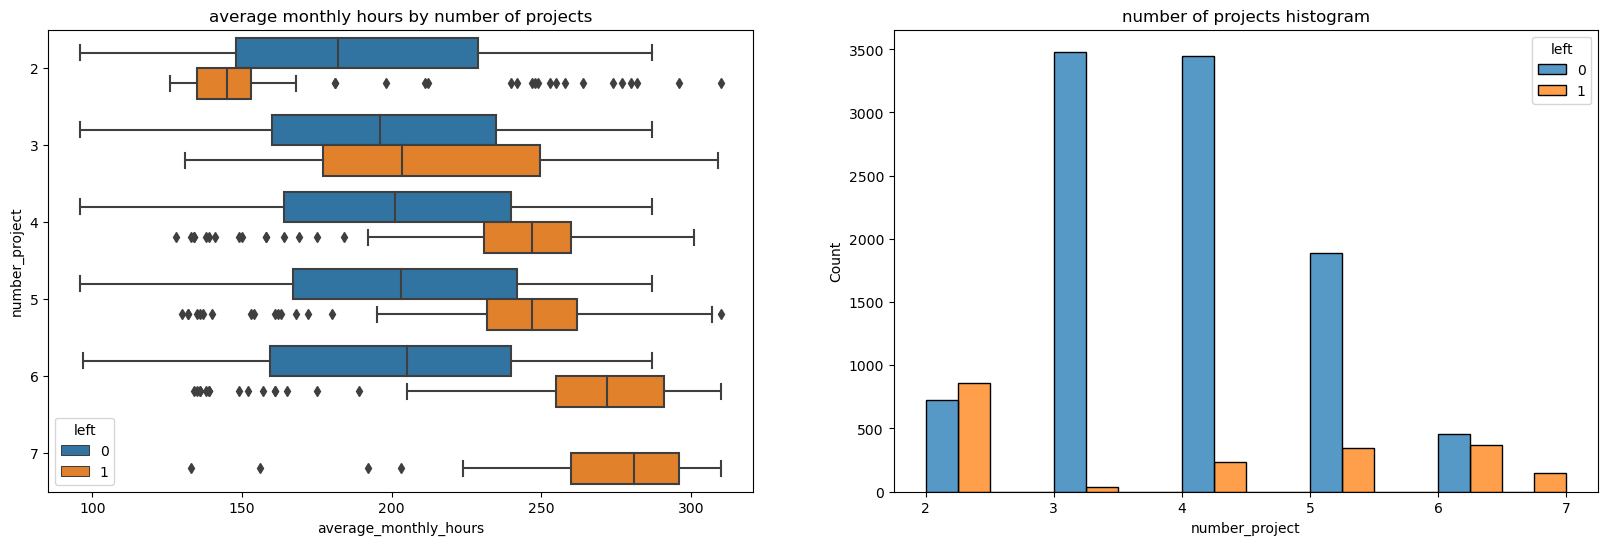

In [16]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1,2)
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left',orient="h", ax=ax[0])
ax[0].set_title('average monthly hours by number of projects')

sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', binwidth=0.5, ax=ax[1])
ax[1].set_title('number of projects histogram')
plt.show()

- Everyone with seven projects left the company. Employees who had seven or six projects and left the company worked more number of hours (approximately 260-280 hours/month) than any other group. 
- Other than the employees worked more hours, the highest group of employees that left the company was the ones that had only two projects and worked a lot less compared to other groups. Even employees who had two projects and stayed in the company worked more hours on average. 
- This might mean that the company is not very succesfull to keep its newer employees and fails maintain engagement and satisfaction.
- Employees who had three, four or five projects demonstared a trend to stay in the company. These group of people worked approximately 200 hours per month on average. 

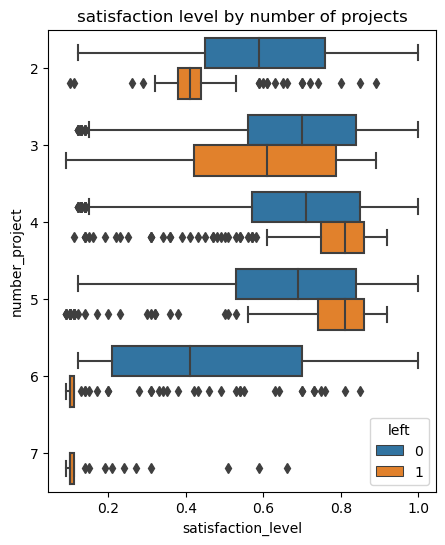

In [17]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df, x='satisfaction_level', y='number_project', orient='h', hue='left')
plt.title('satisfaction level by number of projects')
plt.show()

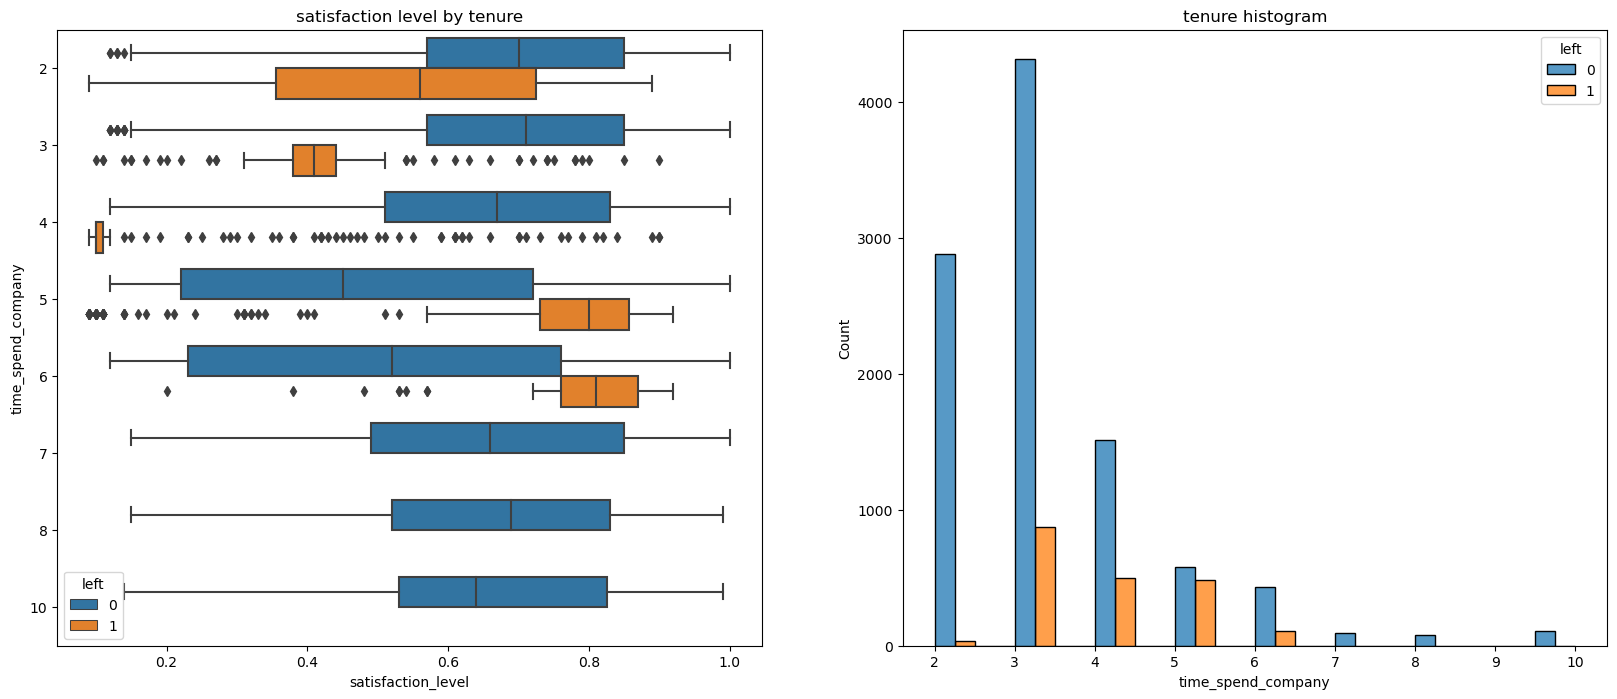

In [18]:
fig = plt.figure(figsize=(20,8))
axes = fig.subplots(1,2)

sns.histplot(data=df, x='time_spend_company',hue='left', multiple='dodge', binwidth=0.5, ax=axes[1])
sns.boxplot(data=df, x='satisfaction_level', y='time_spend_company', orient='h', hue='left', ax=axes[0])

axes[0].set_title('satisfaction level by tenure')
axes[1].set_title('tenure histogram')
plt.show()

- The people who left company in their fourth year demonstrated low level of satisfaction, lowest compared to other groups. Employees who left in their fifth and sixth year demonstrated high levels of satisfaction, we can assume that there is an another reason for them to leave. In the meantime, employees in the same group who have chosen to stay demonstrated lower satisfaction levels compared to those left. 
- The number of employees decreases as the tenure increases. This is because the company's low employee retention rate. Most of the employees are in their second and third year.

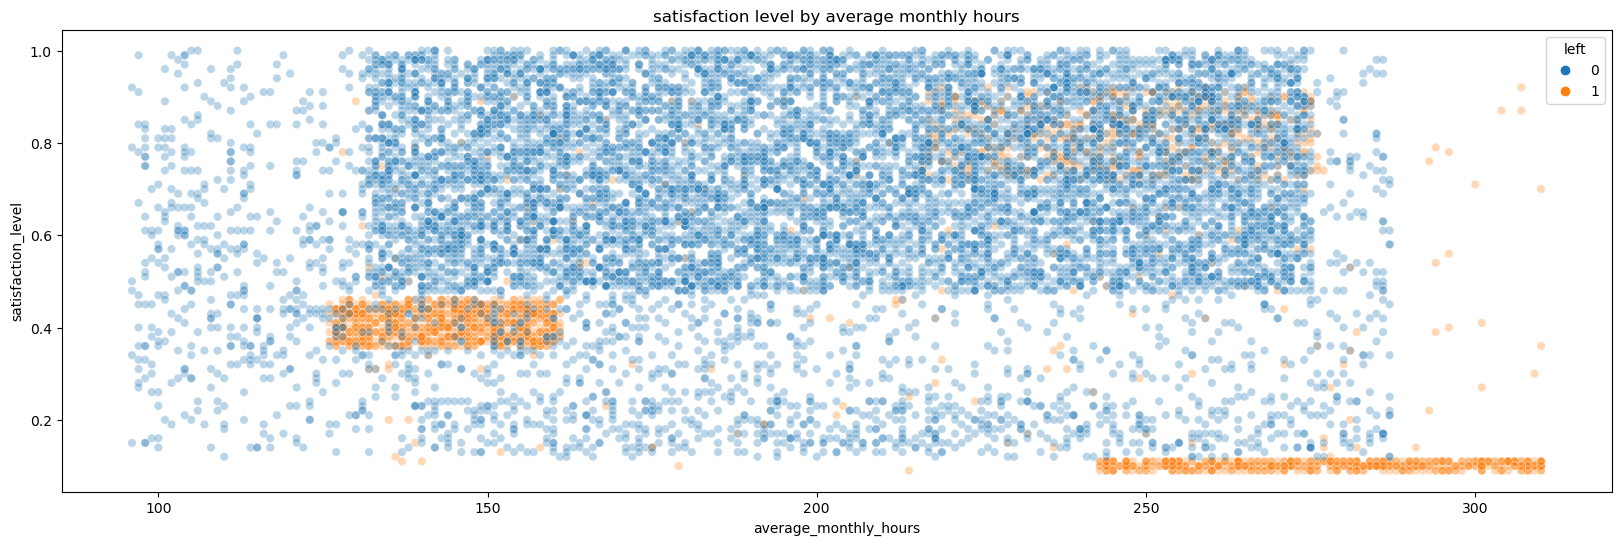

In [19]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.3)
plt.title('satisfaction level by average monthly hours')
plt.show()

- The preciding scatter plot demonstrates three groups of employees left the company, the ones that worked fewer hours monthly and had low satisfaction levels, the ones that worked more hours (appoximately 250-300 hours/month) and had the lowest satisfaction levels, and finally the ones worked 220-270 hours and had high level of satisfaction.

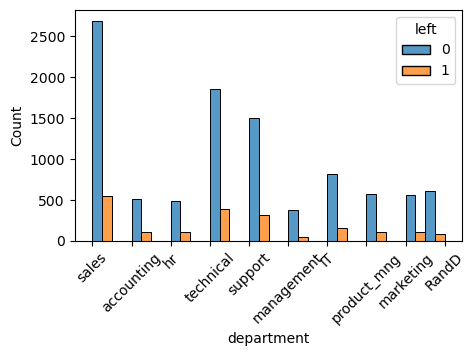

In [20]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='department', hue='left', multiple='dodge', discrete=False)
plt.xticks(rotation=45)
plt.show()

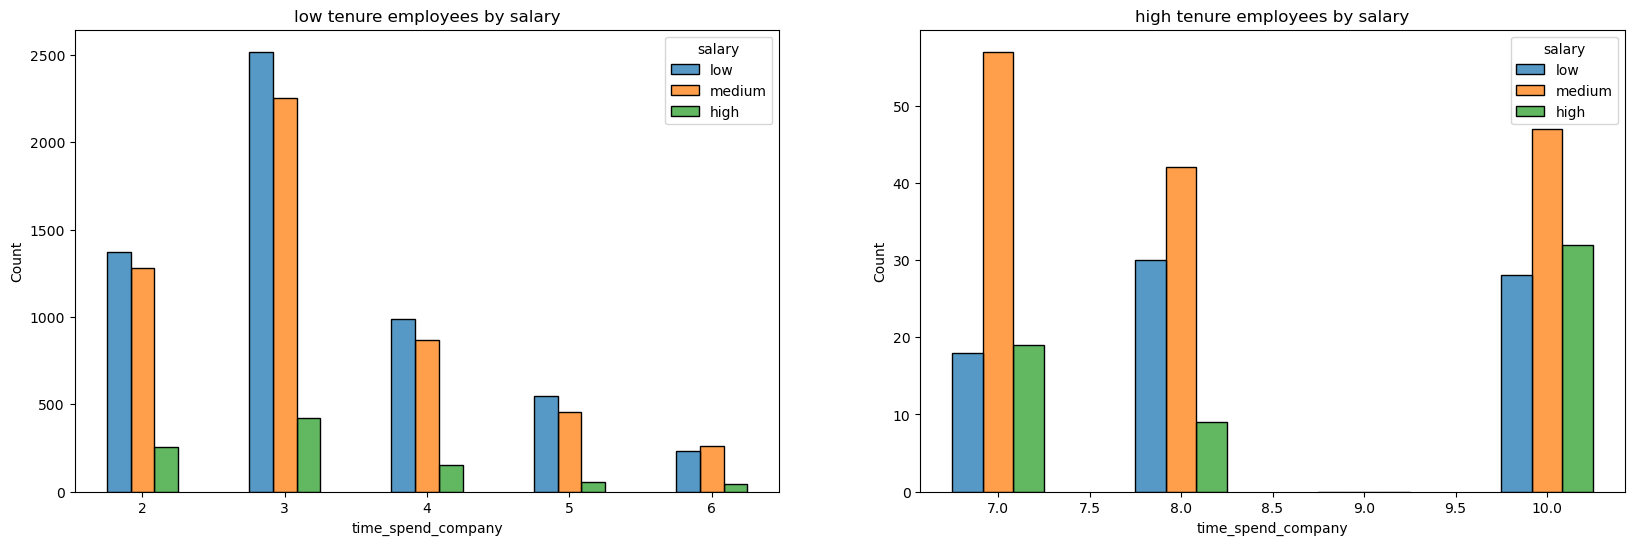

In [101]:
low_tenure = df[df['time_spend_company']<=6]
high_tenure = df[df['time_spend_company']>6]

fig = plt.figure(figsize=(20,6))
axes = fig.subplots(1,2)

sns.histplot(data=low_tenure, x='time_spend_company', hue='salary', multiple='dodge', discrete=1, shrink=.5, ax=axes[0])
sns.histplot(data=high_tenure, x='time_spend_company', hue='salary', multiple='dodge', discrete=1, shrink=.5, ax=axes[1], hue_order=['low','medium','high'])

axes[0].set_title('low tenure employees by salary')
axes[1].set_title('high tenure employees by salary')
plt.show()

The preceding visualization highlights a disparity in salary distribution, particularly among employees with extensive tenure. The graph illustrates an imbalance that may warrant further investigation or consideration within the high-tenure employee group.

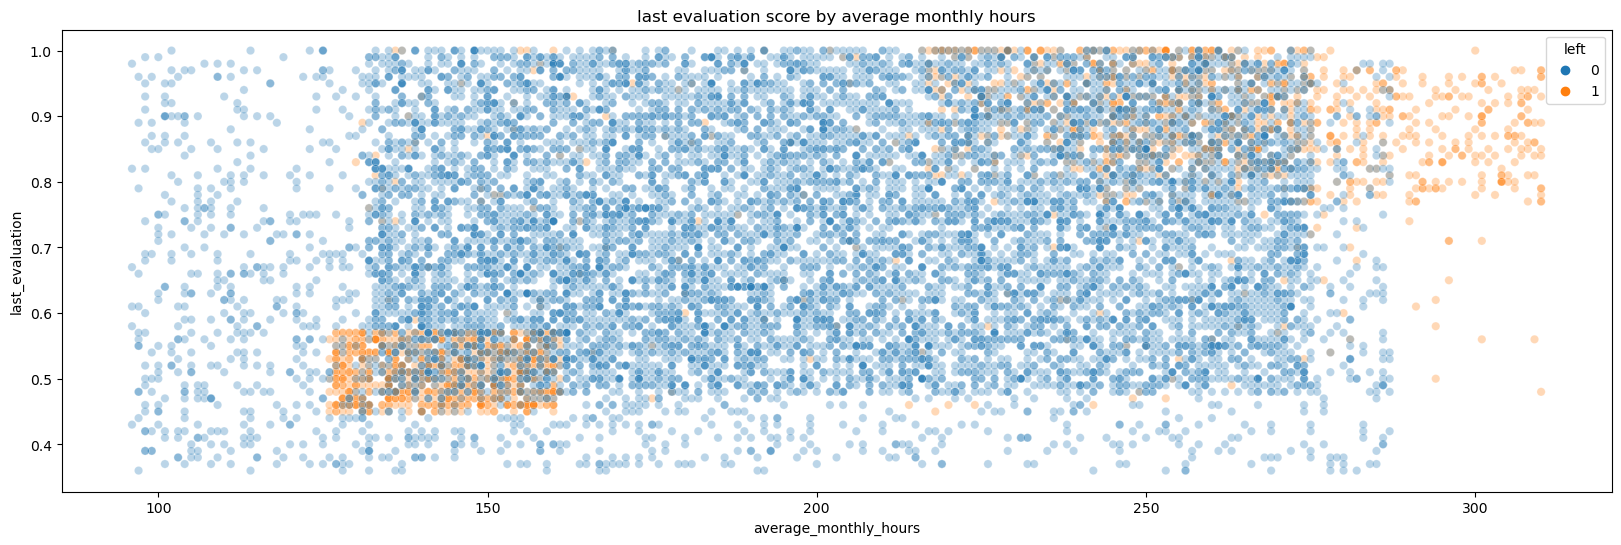

In [22]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.3)
plt.title('last evaluation score by average monthly hours')
plt.show()

- The preciding scatter plots shows two group of employees who left the company. First group worked 230-300 hours/month and had high last evaluation score. On the other hand second group worked 130-160 hours/month and had lower evaluation scores.
- Analyzing these patterns, it becomes evident that the first group, requiring 230-300 hours/month and boasting high evaluation scores, might pose a higher cost to the company compared to the second group. This insight prompts a closer examination of the factors contributing to these variations in both working hours and evaluation scores.

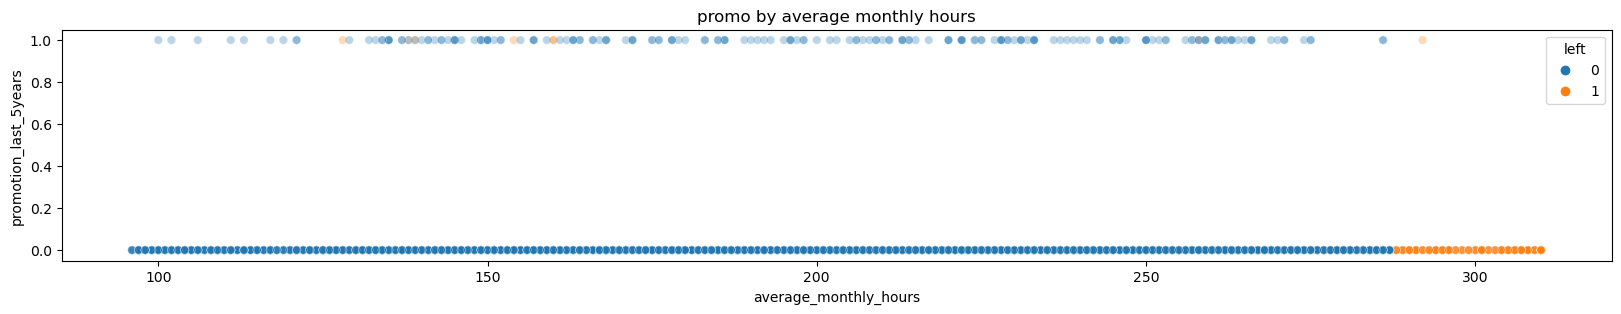

In [23]:
plt.figure(figsize=(20,3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.3)
plt.title('promo by average monthly hours')
plt.show()

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

<AxesSubplot:>

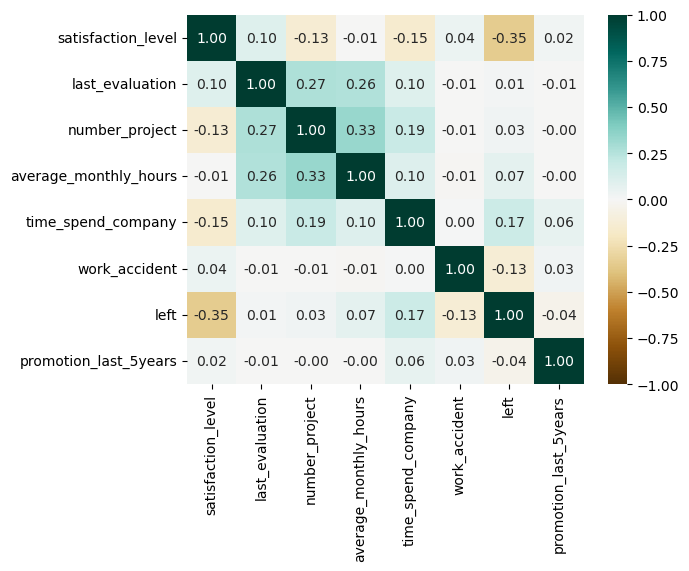

In [24]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='BrBG')

- `average_monthly_hours`, `time_spend_company` and `last_evaluation` have positive correlation between each other. On the other hand `satisfaction_level` and `left` have negative correlation.

### Insights from exploratory data analysis

- It looks like the reason why the employees leave the company is related to the long working hours and workload. Satisfaction level is the other factor related to the retention rate. Also, it is visible that employees who worked over 7 and more years in the company tend to not leave the company.


__Hypothesis 1: Satisfaction Level Influences Employee Retention__

H0: Job satisfaction has no significant impact on employee retention.

H1: There is a significant positive relationship between job satisfaction levels and employee retention.

__Hypothesis 2: Longevity in Company Leads to Higher Retention Rates__

H0: The duration of employment with the company does not affect employee retention rates.

H1: There is a significant positive relationship between the duration of employment (7 years or more) and higher retention rates.

First, we need to convert categorical variables into numerical variables.

In [25]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [26]:
df_copy = df.copy()

# Initialize LabelEncoder for 'department'
label_encoder = LabelEncoder()

# Initialize OrdinalEncoder for 'salary' with ordinal categories
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])

# Encode 'department' using LabelEncoder
df_copy['department_encoded'] = label_encoder.fit_transform(df_copy['department'])

# Encode 'salary' using OrdinalEncoder
# Reshape the data to a 2D array-like structure
df_copy['salary_encoded'] = ordinal_encoder.fit_transform(df_copy[['salary']])

df_copy.tail(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,department_encoded,salary_encoded
11990,0.49,0.49,4,212,7,0,0,0,product_mng,medium,6,1.0
11991,0.60,0.53,2,235,7,0,0,0,IT,medium,0,1.0
11992,0.62,0.85,3,237,3,1,0,0,IT,medium,0,1.0
11993,0.64,0.50,4,253,10,0,0,1,management,high,4,2.0
11994,0.22,0.94,3,193,10,0,0,1,management,high,4,2.0
11995,0.90,0.55,3,259,10,1,0,1,management,high,4,2.0
11996,0.74,0.95,5,266,10,0,0,1,management,high,4,2.0
11997,0.85,0.54,3,185,10,0,0,1,management,high,4,2.0
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,5,2.0
11999,0.50,0.73,4,180,3,0,0,0,IT,low,0,0.0


In [27]:
'''Hypothesis 1: Satisfaction Level Influences Employee Retention
H0: Job satisfaction has no significant impact on employee retention.
H1: There is a significant positive relationship between job satisfaction levels and employee retention. '''

emp_left = df_copy[df_copy['left']==1]['average_monthly_hours']
emp_stayed = df_copy[df_copy['left']==0]['average_monthly_hours']

stats.ttest_ind(a=emp_left, b=emp_stayed, equal_var=False)


Ttest_indResult(statistic=6.368796832309122, pvalue=2.2679467569333254e-10)

In [28]:
'''Hypothesis 2: Longevity in Company Leads to Higher Retention Rates
H0: The duration of employment with the company does not affect employee retention rates.
H1: There is a significant positive relationship between the duration of employment (7 years or more) and higher retention rates.'''

emp_left1 = df_copy[(df_copy['left']==1) & (df_copy['time_spend_company'] < 7)]['time_spend_company']
emp_stayed1 = df_copy[(df_copy['left']==0) & (df_copy['time_spend_company'] >= 7)]['time_spend_company']

stats.ttest_ind(a=emp_left1, b=emp_stayed1, equal_var=False)

Ttest_indResult(statistic=-56.714326835256536, pvalue=1.896492064493825e-171)

### Logistic Regression

Assumptions are:

- Linearity: The relationship between predictors and log-odds is linear.
- Independence: Observations are independent.
- No Multicollinearity: Predictors are not highly correlated.
- Homoscedasticity: Variability in log-odds is consistent.
- No Outliers: Outliers are addressed.
- Binary/Ordinal Response: Suitable for binary or ordinal outcomes.

In [29]:
df_copy.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'department_encoded',
       'salary_encoded'],
      dtype='object')

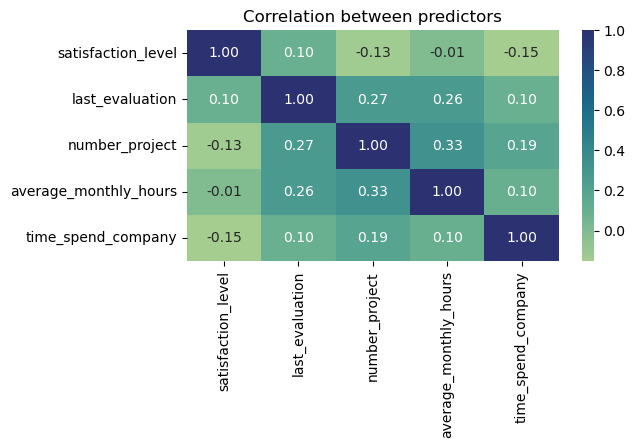

In [30]:
# Check multicollinearity

plt.figure(figsize=(6,3))
sns.heatmap(df_copy[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company']].corr(), cmap='crest', annot=True, fmt='.2f')
plt.title('Correlation between predictors')
plt.show()

There is no strong correlation between predictor variables.

In [31]:
# Remove outliers
df_logreg = df_copy[(df_copy['time_spend_company'] <= upper_limit) & (df_copy['time_spend_company'] >=lower_limit)]
df_logreg.shape

(11167, 12)

In [72]:
logisticreg = LogisticRegression(random_state=42, max_iter=500)

X = df_logreg.drop(['department','salary','satisfaction_level','left',], axis=1)
y = df_logreg['left']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

model_log = logisticreg.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

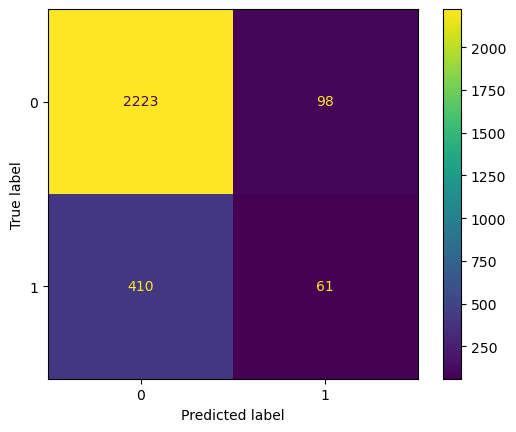

In [73]:
# Compute values for confusion matrix
log_cm = metrics.confusion_matrix(y_test, y_pred, labels=model_log.classes_)

# Create display of confusion matrix
log_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=model_log.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [74]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.84      0.96      0.90      2321
    Predicted would leave       0.38      0.13      0.19       471

                 accuracy                           0.82      2792
                macro avg       0.61      0.54      0.55      2792
             weighted avg       0.77      0.82      0.78      2792



**Precision:**
- For the "Predicted would not leave" class, the model demonstrates a solid precision of 0.86, indicating a high accuracy in predicting instances that would not leave.
- However, the precision for the "Predicted would leave" class is lower at 0.46, suggesting that the model's positive predictions for leaving instances are less reliable.

**Recall:**
- The "Predicted would not leave" class exhibits a high recall of 0.93, indicating that the model effectively captures most of the actual instances that would not leave.
- On the other hand, the recall for the "Predicted would leave" class is considerably lower at 0.27, implying that the model misses a significant number of actual instances of leaving.

**F1-Score:**
- The F1-score for "Predicted would not leave" is strong at 0.90, showcasing a balanced performance between precision and recall.
- However, the F1-score for "Predicted would leave" is lower at 0.34, indicating an imbalance and room for improvement.

**Accuracy:**
- The overall accuracy is 0.82, suggesting that the model correctly predicts the outcome for 82% of the instances.


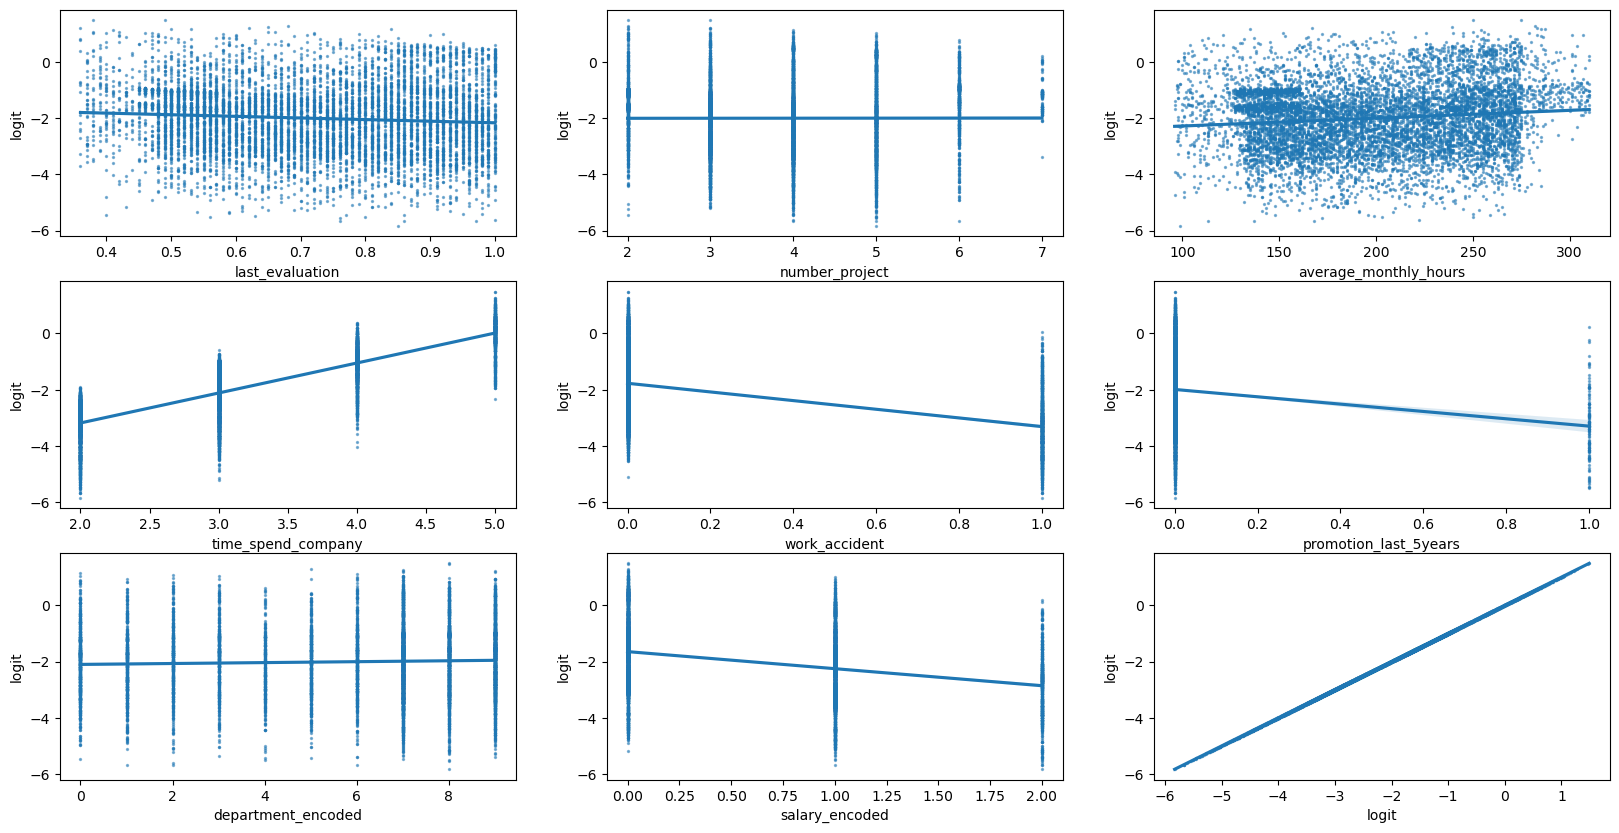

In [75]:
# check linearity assumption

# 1. Copy the `X_train` dataframe and assign to `logit_data`
training_probabilities = model_log.predict_proba(X_train)
logit_data = X_train.copy()

logit_data.head()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

fig = plt.figure(figsize=(20,10))
axes = fig.subplots(3,3)

for i, ax in enumerate(axes.flatten()):
    sns.regplot(x=logit_data.columns[i], y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5}, ax=ax)

### Random Forest Classification

In [36]:
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,department_encoded,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,1.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,0.0


In [76]:
# start the random forest classifier
rfc = RandomForestClassifier(random_state=42)

# create a dictionary of hyperparameters to tune
rfc_params = {'n_estimators' : [150, 200, 300, 500],
              'max_features' : ['sqrt', 'log2', 'auto'],
              'max_samples': [0.7, 1.0],
              'max_depth' : [3,5,None],
              'min_samples_split' : [2,3,4],
              'min_samples_leaf' : [1,2,3]}

# define a dictionary of scoring metrics
scoring = {'accuracy', 'recall', 'precision', 'f1', 'roc_auc'}

# instantiate the GridSearchCV object
rfc_cv = GridSearchCV(rfc, rfc_params, scoring=scoring, refit='roc_auc')

In [77]:
# fit the model to the training data
rfc_cv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150, 200, 300, 500]},
             refit='roc_auc',
             scoring={'precision', 'roc_auc', 'recall', 'accuracy', 'f1'})

In [78]:
# best_score_ and best_params
rfc_cv.best_score_
# best_estimator_

0.9778084708522977

In [79]:
rfc_cv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [80]:
rfc_cv.best_estimator_

RandomForestClassifier(max_features='sqrt', max_samples=1.0, min_samples_leaf=3,
                       n_estimators=200, random_state=42)

In [81]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                        })
  
    return table

In [82]:
results = make_results('RF cv', rfc_cv, 'auc')
results

,model,precision,recall,f1,accuracy,AUC
0,RF cv,0.950763,0.900762,0.924975,0.975403,0.977808


In [83]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = metrics.roc_auc_score(y_test_data, preds)
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [84]:
rfc_test_scores = get_scores('Random forest test', rfc_cv, X_test, y_test)
results = pd.concat([results, rfc_test_scores], axis=0)
results

,model,precision,recall,f1,accuracy,AUC
0,RF cv,0.950763,0.900762,0.924975,0.975403,0.977808
0,Random forest test,0.948775,0.904459,0.926087,0.975645,0.947275


In [85]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [86]:
# 1. Instantiate the XGBoost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [3,4,5,7],
             'min_child_weight': [3,5,7,9],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [200,300,500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [87]:
xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num

In [88]:
xgb_cv.best_score_

0.9806884384009859

In [89]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 500}

In [90]:
xgb_test_scores = get_scores('XGB test', xgb_cv, X_test, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,f1,accuracy,AUC
0,RF cv,0.950763,0.900762,0.924975,0.975403,0.977808
0,Random forest test,0.948775,0.904459,0.926087,0.975645,0.947275
0,XGB test,0.945055,0.912951,0.928726,0.976361,0.951090


In [91]:
xgb_results = make_results('XGB cv', xgb_cv, 'auc')
xgb_results

,model,precision,recall,f1,accuracy,AUC
0,XGB cv,0.948969,0.907171,0.927454,0.97612,0.980688


In [92]:
results = pd.concat([results, xgb_results], axis=0)
results

,model,precision,recall,f1,accuracy,AUC
0,RF cv,0.950763,0.900762,0.924975,0.975403,0.977808
0,Random forest test,0.948775,0.904459,0.926087,0.975645,0.947275
0,XGB test,0.945055,0.912951,0.928726,0.976361,0.951090
0,XGB cv,0.948969,0.907171,0.927454,0.976120,0.980688


In [93]:
results = results.sort_values('model')
results

,model,precision,recall,f1,accuracy,AUC
0,RF cv,0.950763,0.900762,0.924975,0.975403,0.977808
0,Random forest test,0.948775,0.904459,0.926087,0.975645,0.947275
0,XGB cv,0.948969,0.907171,0.927454,0.976120,0.980688
0,XGB test,0.945055,0.912951,0.928726,0.976361,0.951090


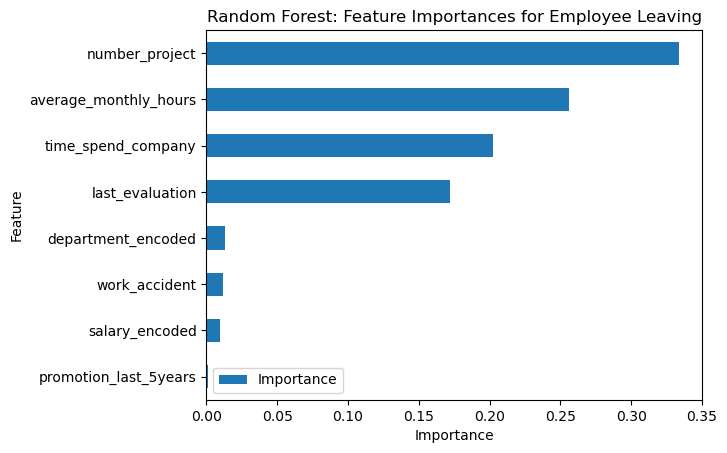

In [95]:
# Get feature importances
feat_impt = rfc_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rfc_cv.best_estimator_.feature_importances_, -8)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

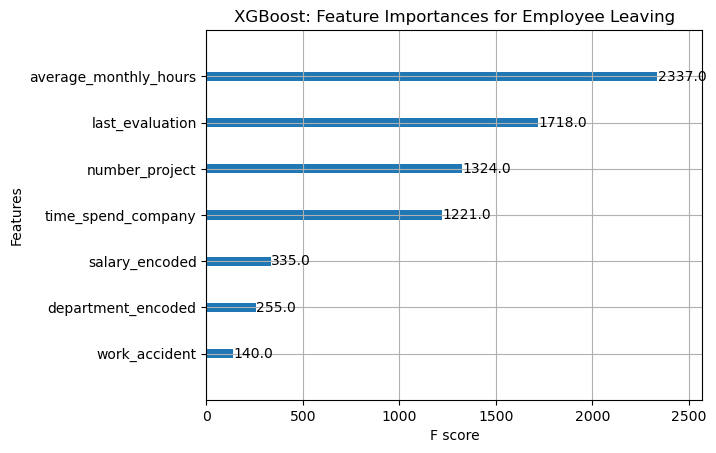

In [100]:
plot_importance(xgb_cv.best_estimator_);
plt.title("XGBoost: Feature Importances for Employee Leaving", fontsize=12)

plt.show()

# Key Insights & Recommendations

- Employees handling seven projects and working 260-280 hours/month exhibit significant turnover. Identifying the reasons behind this trend is essential for targeted retention efforts and overall workforce optimization.

- Departures are notable among individuals managing only two projects, indicating potential retention struggles for newer employees. Addressing the factors contributing to this trend is vital for enhancing the onboarding and job satisfaction of recently hired staff.

- Employees handling three to five projects demonstrate higher retention rates, maintaining an average workload of around 200 hours/month. Recognizing and replicating the positive aspects of this group's experience could contribute to overall employee retention strategies.

- A discernible imbalance in salary distribution, especially among high-tenure employees, calls for an in-depth investigation. Uncovering the reasons behind this disparity is crucial for promoting fairness and equity within the organization's compensation structure.

- Implement measures to enhance engagement and satisfaction among newer employees.

- Evaluate and address workload concerns, particularly for employees with higher project counts.

- Investigate and rectify salary disparities among high-tenure employees.

- Enhance promotion and recognition programs to boost employee morale and retention.

- Regularly monitor working hours and performance scores to identify potential burnout or disengagement issues.
